In [1]:
import os
os.chdir('..')
from visual import config
import requests
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
import geopandas as gpd


In [4]:
path_vec_tibet = 'data/tibet/tibet-plateau-boundary/TPBoundary_HF/TPBoundary_HF.gpkg'
geodf_vec_tibet = gpd.read_file(path_vec_tibet)


In [5]:
# tibet_mpolygon = geodf_vec_tibet['geometry']
# tibet_mpolygon_wgs84 = tibet_mpolygon.to_crs({'init': 'epsg:4326'})
# # print(tibet_mpolygon.bounds)
# bounds = tibet_mpolygon_wgs84.bounds
# bounds


/home/yons/miniconda3/envs/venv-luo/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,minx,miny,maxx,maxy
0,73.49896,25.995483,104.422485,39.988892


In [6]:
## configuration
tibet_bounds = (73.50, 26.00, 104.42, 39.99)    # tibet


## **Download SRTM DEM**

In [3]:
## !!!! unable to download so big data by using requests api.
## !!!! so download fromt the web: https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1
# demtype = "SRTMGL3"

# ### tile 1
# url = "https://portal.opentopography.org/API/globaldem?demtype={}&west={}&south={}&east={}&north={}&outputFormat=GTiff".format(demtype, *tibet_bounds)
# path_dem = config.root_proj + '/data/dem/' + 'tibet_{}.tif'.format(demtype)
# #  ----- download -----  ##
# response = requests.get(url)
# if not os.path.exists(path_dem):
#     open(path_dem, 'wb').write(response.content)



In [49]:
# ## mosaic
# os.chdir(config.root_proj + '/data/tibet/dem')

# file_1 = 'output_SRTMGL3_1.tif'
# file_2 = 'output_SRTMGL3_2.tif'
# out_file = 'tibet_SRTMGL3.tif'
# !gdal_merge.py -init 0 -o $out_file $file_1 $file_2 


0...10...20...30...40...50...60...70...80...90...100 - done.


In [50]:
## downsampling
out_file_down = 'tibet_SRTMGL3_down.tif'
!gdal_translate -outsize 10% 10% -r average $out_file $out_file_down


Input file size is 37104, 16788
0...10...20...30...40...50...60...70...80...90...100 - done.


## **Image visualization**

In [7]:
os.chdir(config.root_proj)
path_srtm = 'data/tibet/dem/tibet_SRTMGL3_down.tif'


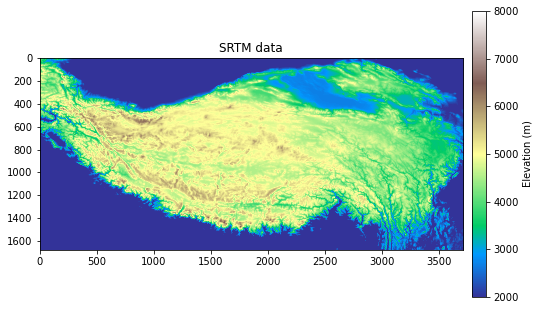

In [8]:
srtm, srtm_info = readTiff(path_srtm)

## SRTM
# cmap = plt.cm.gist_earth
# cmap = plt.cm.gist_earth
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('SRTM data') 
plt.imshow(srtm, cmap=cmap, clim=[2000, 8000], alpha=1)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

